This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.

The units are in degrees Celsius and there are 3650 observations. The source of the data is credited as the Australian Bureau of Meteorology.

https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/

https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

Introduction to Time Series and Forecasting by Brockwell and Davis. The book is a bit stats-heavy, but if you have the skill to read-between-lines, you can understand the concepts and tangentially touch the statistics.

In [1]:
import pandas as pd

In [12]:
df = pd.read_csv('../data/daily-min-temperatures.csv',
                 parse_dates=['Date'])

In [13]:
df.head(2)

Date  Temp
0 1981-01-01  20.7
1 1981-01-02  17.9

In [14]:
df.describe()

Temp
count  3650.000000
mean     11.177753
std       4.071837
min       0.000000
25%       8.300000
50%      11.000000
75%      14.000000
max      26.300000

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [18]:
df = df.set_index("Date")

In [19]:
df

Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
...          ...
1990-12-27  14.0
1990-12-28  13.6
1990-12-29  13.5
1990-12-30  15.7
1990-12-31  13.0

[3650 rows x 1 columns]

In [20]:
df.isnull().sum()

Temp    0
dtype: int64

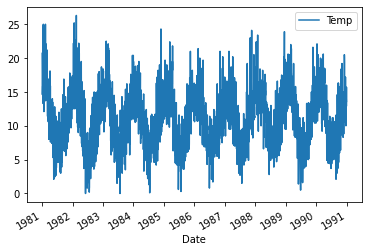

In [21]:
df.plot()

In [22]:
import pandas as pd
#importing plotly and cufflinks in offline mode
import cufflinks as cf

import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [23]:
#minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.
df.iplot()

In [24]:
df.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3650, freq=None)

In [27]:
#indexin
df.loc['1990-12-30']

Temp    15.7
Name: 1990-12-30 00:00:00, dtype: float64

In [28]:
from datetime import datetime

df.loc['1990-12-20':'1990-12-30']


Temp
Date            
1990-12-20  15.4
1990-12-21  13.1
1990-12-22  13.2
1990-12-23  13.9
1990-12-24  10.0
1990-12-25  12.9
1990-12-26  14.6
1990-12-27  14.0
1990-12-28  13.6
1990-12-29  13.5
1990-12-30  15.7

In [29]:
df['1990']

Temp
Date            
1990-01-01  14.8
1990-01-02  13.3
1990-01-03  15.6
1990-01-04  14.5
1990-01-05  14.3
...          ...
1990-12-27  14.0
1990-12-28  13.6
1990-12-29  13.5
1990-12-30  15.7
1990-12-31  13.0

[365 rows x 1 columns]

In [30]:
df.loc['1990']

Temp
Date            
1990-01-01  14.8
1990-01-02  13.3
1990-01-03  15.6
1990-01-04  14.5
1990-01-05  14.3
...          ...
1990-12-27  14.0
1990-12-28  13.6
1990-12-29  13.5
1990-12-30  15.7
1990-12-31  13.0

[365 rows x 1 columns]

In [31]:
Plotting Rolling Statistics
- static mean, variance, covariance

SyntaxError: invalid syntax (<ipython-input-31-1ecaac1f614c>, line 1)

In [ ]:
Dickey-fuller test
h0 - ts non-stationary

In [35]:
!which python

/usr/local/bin/python


In [61]:
%matplotlib inline
%matplotlib widget
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'ipympl'

In [58]:
plt.ion()

In [68]:
"""
helper fn to plot and test stationarity
"""
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
#     rolmean = pd.rolling_mean(timeseries, window=12) 
#     rolstd = pd.rolling_std(timeseries, window=12)

    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(12,8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

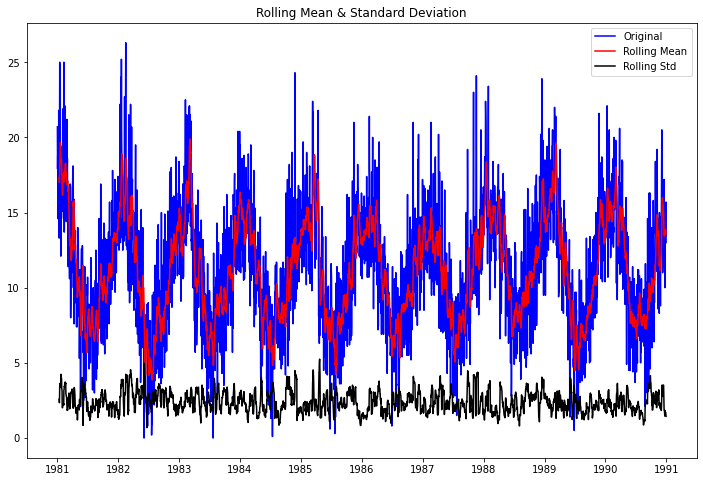

Results of Dickey-Fuller Test:
Test Statistic                   -4.444805
p-value                           0.000247
#Lags Used                       20.000000
Number of Observations Used    3629.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64


In [69]:
test_stationarity(df)

In [71]:
import numpy as np

/Users/fninsiima/PycharmProjects/FenixDataScience/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log



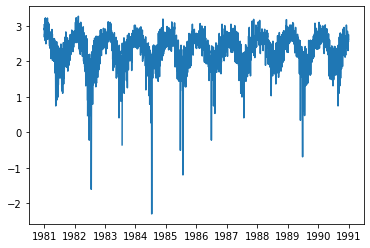

In [78]:
ts_log = np.log(df)
plt.plot(ts_log)

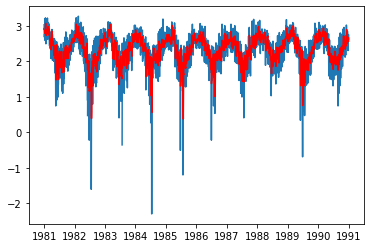

In [79]:
moving_avg = ts_log.rolling(6).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [80]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Temp
Date                
1981-01-01       NaN
1981-01-02       NaN
1981-01-03       NaN
1981-01-04       NaN
1981-01-05       NaN
1981-01-06 -0.081629
1981-01-07 -0.036608
1981-01-08  0.064574
1981-01-09  0.265338
1981-01-10  0.126709
1981-01-11 -0.088179
1981-01-12 -0.256719

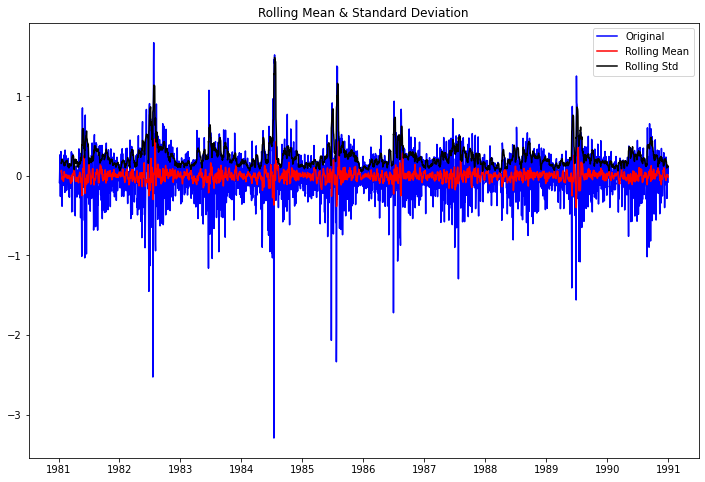

Results of Dickey-Fuller Test:
Test Statistic                -1.851484e+01
p-value                        2.112298e-30
#Lags Used                     2.200000e+01
Number of Observations Used    3.610000e+03
Critical Value (1%)           -3.432163e+00
Critical Value (5%)           -2.862341e+00
Critical Value (10%)          -2.567196e+00
dtype: float64


In [81]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

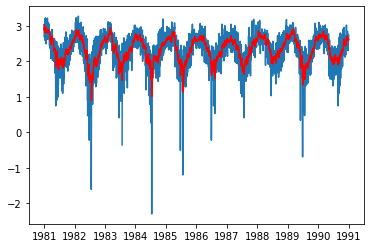

In [85]:
expwighted_avg = ts_log.ewm(halflife=6).mean()#pd.ewma(ts_log, halflife=6)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

In [84]:
type(ts_log)

pandas.core.frame.DataFrame

#### check for np.isfinite 

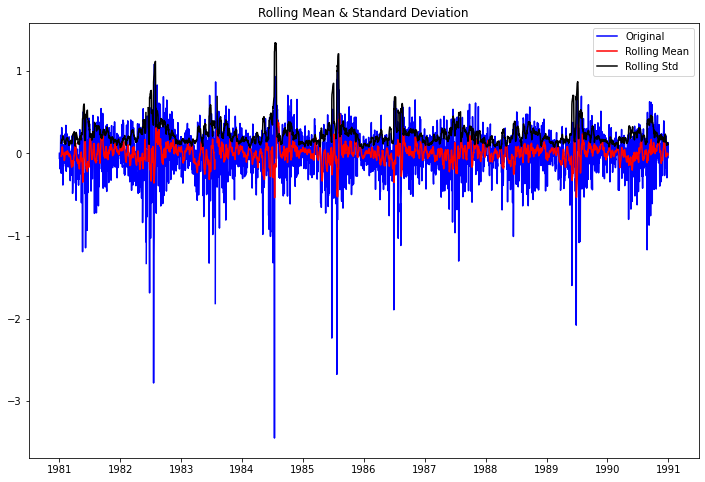

Results of Dickey-Fuller Test:


/Users/fninsiima/PycharmProjects/FenixDataScience/venv/lib/python3.6/site-packages/numpy/linalg/linalg.py:1872: RuntimeWarning:

invalid value encountered in greater



MissingDataError: exog contains inf or nans

In [86]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

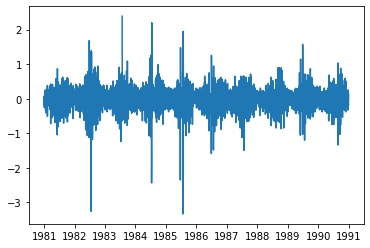

In [87]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

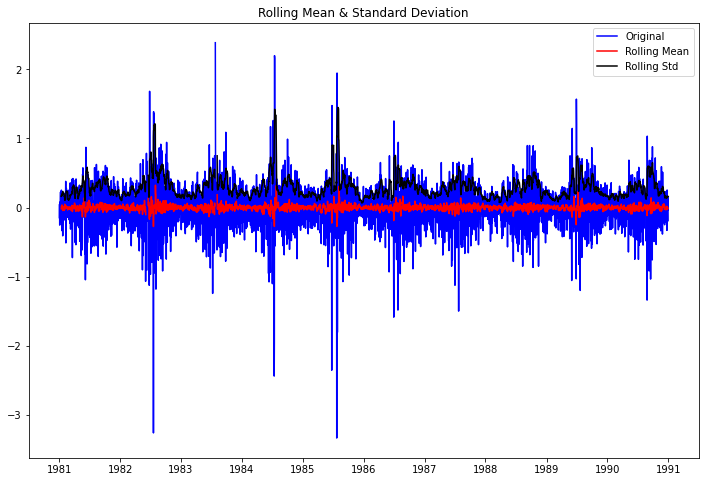

Results of Dickey-Fuller Test:


MissingDataError: exog contains inf or nans

In [88]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

###### check for np.isfinite 

In [90]:
ts_log_diff.isnull().sum()

Temp    0
dtype: int64

In [95]:
df.head()

Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8

In [ ]:
ts_log

In [91]:
ts_log_diff.head()

Temp
Date                
1981-01-02 -0.145333
1981-01-03  0.049056
1981-01-04 -0.252835
1981-01-05  0.078988
1981-01-06  0.000000

In [93]:
ts_log.isna().sum()

Temp    0
dtype: int64

In [107]:
ts_log = ts_log.asfreq('d')
ts_log = ts_log.fillna(method='bfill').fillna(method='ffill')


In [102]:
df = df.asfreq('d')
df.index.inferred_freq, df.index.dtype

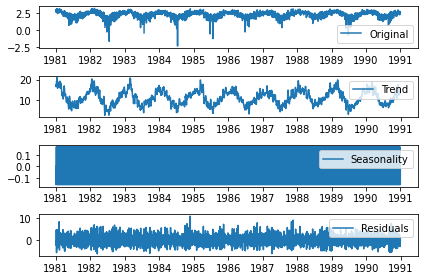

In [109]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df.fillna(method='bfill').fillna(method='ffill'))

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

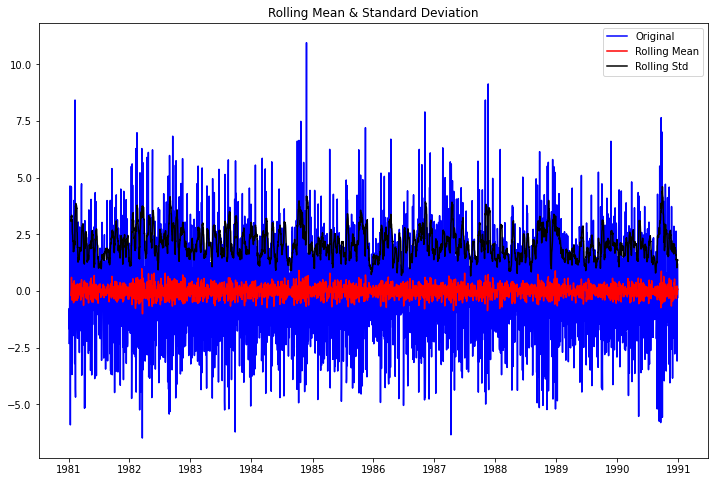

Results of Dickey-Fuller Test:
Test Statistic                  -22.232948
p-value                           0.000000
#Lags Used                       30.000000
Number of Observations Used    3615.000000
Critical Value (1%)              -3.432160
Critical Value (5%)              -2.862340
Critical Value (10%)             -2.567196
dtype: float64


In [110]:
#model residual
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [97]:
pd.Index.inferred_freq?

Object `pd.Index.inferred_freq` not found.


In [103]:
df.index.inferred_freq

'D'

In [104]:
df.index.dtype

dtype('<M8[ns]')

In [115]:
np.isfinite(ts_log_diff).all()

Temp    False
dtype: bool

In [123]:
ts_log_diff[np.isfinite(ts_log_diff)].shape

(3649, 1)

In [126]:
ts_log_diff[np.isfinite(ts_log_diff).all(1)].shape


(3645, 1)

In [124]:
ts_log_diff.shape

(3649, 1)

In [127]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff[np.isfinite(ts_log_diff).all(1)], nlags=10)
lag_pacf = pacf(ts_log_diff[np.isfinite(ts_log_diff).all(1)], nlags=10, method='ols')

/Users/fninsiima/PycharmProjects/FenixDataScience/venv/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



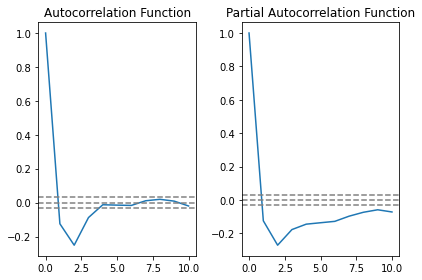

In [128]:

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

/Users/fninsiima/PycharmProjects/FenixDataScience/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/fninsiima/PycharmProjects/FenixDataScience/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

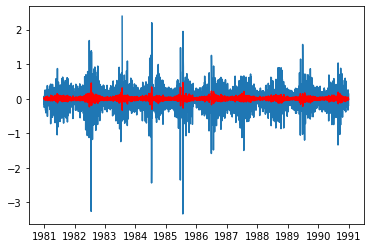

In [129]:
#AR
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log[np.isfinite(ts_log).all(1)], order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff[np.isfinite(ts_log_diff).all(1)])**2))

/Users/fninsiima/PycharmProjects/FenixDataScience/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/fninsiima/PycharmProjects/FenixDataScience/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

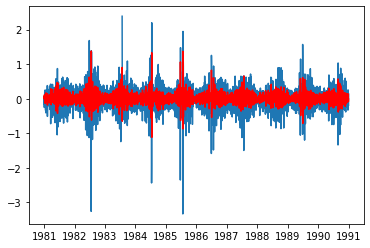

In [130]:
model = ARIMA(ts_log[np.isfinite(ts_log).all(1)], order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff[np.isfinite(ts_log_diff).all(1)])**2))

/Users/fninsiima/PycharmProjects/FenixDataScience/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

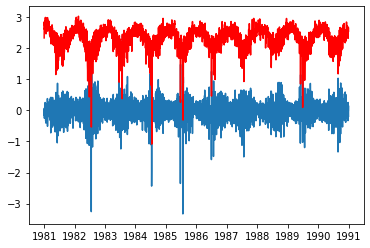

In [133]:
model = ARIMA(ts_log[np.isfinite(ts_log).all(1)], order=(1, 0, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff[np.isfinite(ts_log_diff).all(1)])**2))

In [134]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Date
1981-01-01    2.332214
1981-01-02    2.849820
1981-01-03    2.749236
1981-01-04    2.781315
1981-01-05    2.599576
dtype: float64

In [135]:
df.head()

Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8

In [136]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Date
1981-01-01     2.332214
1981-01-02     5.182034
1981-01-03     7.931270
1981-01-04    10.712585
1981-01-05    13.312161
dtype: float64

In [144]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[:,0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
1981-01-01     5.362348
1981-01-02     8.066835
1981-01-03    10.865127
1981-01-04    13.393607
1981-01-05    16.072171
dtype: float64

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

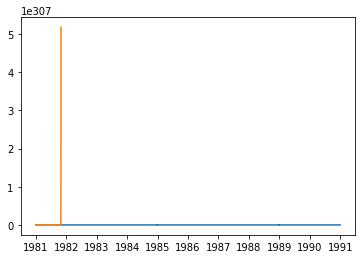

In [148]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-df)**2)/len(df)))